In [12]:
import pickle
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data



plt.rcParams.update({'font.size': 10})

# print(os.listdir('generalization'))
root_folder='generalization'

folders=os.listdir(root_folder)
folders.sort()


df={'Train':[],'Test':[],'Model':[],'Performance Ratio':[]}


for folder in folders:

    if folder.startswith('rnd'):
        train_dist='ER'
    elif folder.startswith('planar'):
        train_dist='Skew'
    else:
        train_dist='torodial'

    
    if folder.endswith('S2V'):
        model='S2V-DQN'
    elif folder.endswith('LSDQN'):
    
        model='LS-DQN'
    elif folder.endswith('LinearRegression'):
        model='SoftTabu'
    elif folder.endswith('TS'):
        model='TS'
    elif folder.endswith('ECO_DQN'):
        model='ECO-DQN'
    # model=folder.split('_',maxsplit=4)[-1]
    # print('Model:',model)
    folder_path=os.path.join(root_folder,folder)
    files=os.listdir(folder_path)
    files.sort()
    for file in files:
        test_distribution=file.split('_',maxsplit=1)[1]
        data=load_pickle(file_path=os.path.join(folder_path,file))
        OPT = load_pickle(f'../data/testing/{test_distribution}/optimal')['OPT']
        ratio=(data['cut']/OPT).mean()
        df['Train'].append(train_dist)
        # df['Test'].append(test_distribution.split('_')[0])
        if test_distribution.startswith('planar'):
            distribution_type = 'Skew'
        elif test_distribution.startswith('rnd'):
            distribution_type = 'ER'
        elif test_distribution.startswith('toro'):
            distribution_type = 'Torodial'

        if distribution_type:
            test_distribution = f'{distribution_type}({test_distribution.split("_")[-1]})'



        df['Test'].append(test_distribution)
        df['Model'].append(model)
        df['Performance Ratio'].append(ratio)
        # df['OPT'] += OPT.to_list()

    
    # print()
    # print(folder)
    # break
root_folder='../ecord/generalization'
folders=os.listdir(root_folder)
folders.sort()

for folder in folders:
    if folder.startswith('rnd'):
        train_dist='ER'
    elif folder.startswith('planar'):
        train_dist='Skew'
    else:
        train_dist='torodial'

    if folder.endswith('ECORD'):
        model='ECORD'
    elif folder.endswith('ECORD_det'):
    
        model='ECORD-det'
    

    # model='ECORD-det'

    folder_path=os.path.join(root_folder,folder)
    files=os.listdir(folder_path)
    files.sort()
    for file in files:
        test_distribution=file.split('_',maxsplit=1)[1]
        data=load_pickle(file_path=os.path.join(folder_path,file))
        OPT = load_pickle(f'../data/testing/{test_distribution}/optimal')['OPT']
        ratio=(data['cut']/OPT).mean()
        df['Train'].append(train_dist)
        # df['Test'].append(test_distribution.split('_')[0])
        if test_distribution.startswith('planar'):
            distribution_type = 'Skew'
        elif test_distribution.startswith('rnd'):
            distribution_type = 'ER'
        elif test_distribution.startswith('toro'):
            distribution_type = 'Torodial'

        if distribution_type:
            test_distribution = f'{distribution_type}({test_distribution.split("_")[-1]})'



        df['Test'].append(test_distribution)
        df['Model'].append(model)
        df['Performance Ratio'].append(ratio)

root_folder='../ANYCSP/generalization'
folders=os.listdir(root_folder)
folders.sort()

for folder in folders:
    if folder.startswith('rnd'):
        train_dist='ER'
    elif folder.startswith('planar'):
        train_dist='Skew'
    else:
        train_dist='torodial'

    if folder.endswith('ANYCSP'):
        model='ANYCSP'
    else:
        pass
    # elif folder.endswith('ECORD_det'):
    
    #     model='ECORD-det'
    

    # model='ECORD-det'

    folder_path=os.path.join(root_folder,folder)
    files=os.listdir(folder_path)
    files.sort()
    for file in files:
        test_distribution=file.split('_',maxsplit=1)[1]
        data=load_pickle(file_path=os.path.join(folder_path,file))
        OPT = load_pickle(f'../data/testing/{test_distribution}/optimal')['OPT']
        ratio=(data['cut']/OPT).mean()
        df['Train'].append(train_dist)
        # df['Test'].append(test_distribution.split('_')[0])
        if test_distribution.startswith('planar'):
            distribution_type = 'Skew'
        elif test_distribution.startswith('rnd'):
            distribution_type = 'ER'
        elif test_distribution.startswith('toro'):
            distribution_type = 'Torodial'

        if distribution_type:
            test_distribution = f'{distribution_type}({test_distribution.split("_")[-1]})'



        df['Test'].append(test_distribution)
        df['Model'].append(model)
        df['Performance Ratio'].append(ratio)
    


folders.sort()
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.DataFrame(df)

# i=0
# for train_dist,train_group_df in df.groupby('Train'):
#     print(train_group_df)
#     # for test_dist,test_group_df in train_group_df.groupby('Test'):

#     plt.figure(dpi=200,figsize=(8, 3))
# #     plt.figure(dpi=200)
#     ax = sns.barplot(data=train_group_df, x="Test", y="Performance Ratio", hue="Model", width=0.5, 
#                      errwidth='1', linewidth=1, edgecolor=".01",
#                      )
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
#     sns.despine(ax=ax, top=True, right=True)
#     ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
#     # if i==2:
#     #     ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
#     # else:
#     #     ax.get_legend().remove()
#     # plt.ylim(0.9, 1)
#     plt.title(f'Trained on {train_dist} distribution',fontsize=16)
#     plt.ylabel('Approx. Ratio',fontsize=16)
#     plt.xlabel('')
#     plt.savefig(f'{train_dist}.pdf',format='pdf', dpi=300,bbox_inches='tight')
#     i+=1
#     break
#     # plt.xlabel('Distributions')

#     # print(train_group_df)
#         # print('')
#         # sns.barplot(x='Model', y='Performance Ratio', data=test_group_df)
#         # break
    

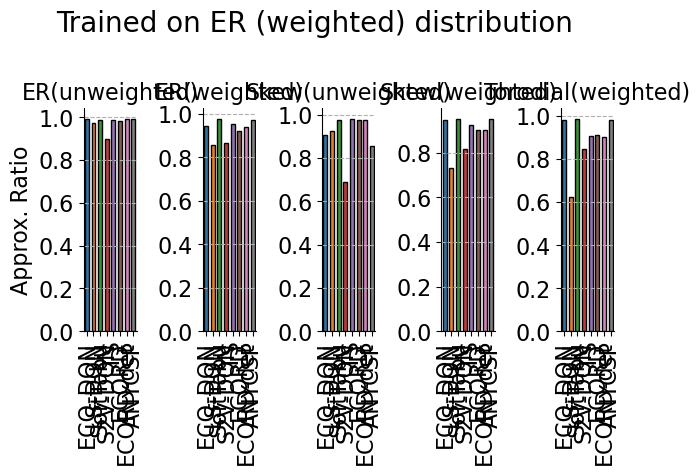

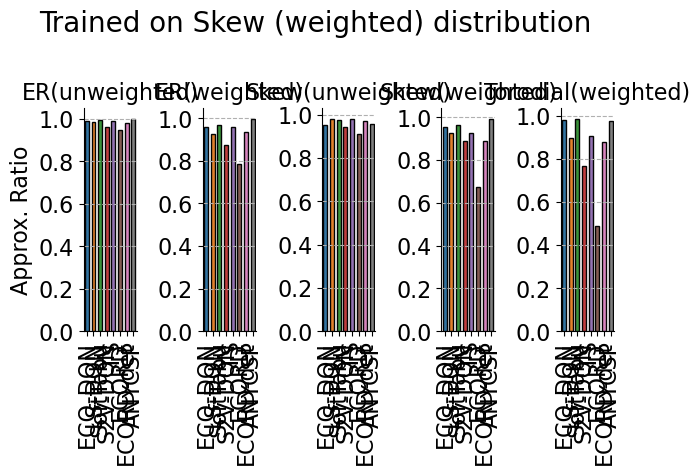

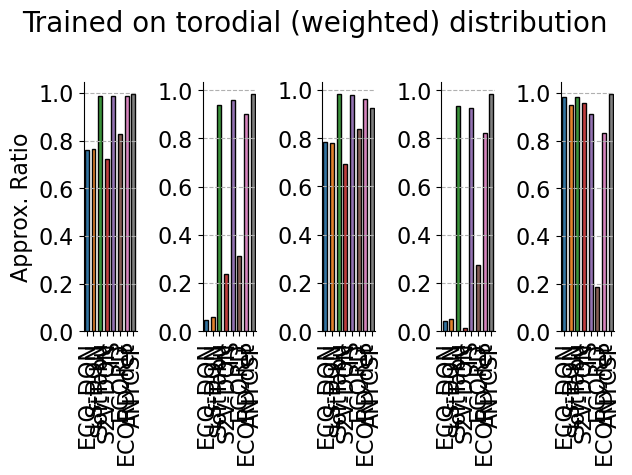

In [14]:
# import seaborn as sns
# import warnings
# import matplotlib.pyplot as plt

# # Suppress Matplotlib user warnings
# warnings.filterwarnings("ignore", category=UserWarning)

# # Standard figure size for consistency
# fig_width = 15
# fig_height = 4
# fontsize = 16

# j = 0
# for train_dist, train_group_df in df.groupby('Train'):
    
#     # fig, axs = plt.subplots(1, 5, figsize=(fig_width, fig_height))
#     fig, axs = plt.subplots(1, 5)
#     fig.suptitle(f'Trained on {train_dist} (weighted) distribution', fontsize=20)

#     i = 0
#     for test_dist, test_group_df in train_group_df.groupby('Test'):
#         sns.barplot(data=test_group_df, x="Model", y="Performance Ratio", ax=axs[i], width=0.6, 
#                     linewidth=1, edgecolor=".01")
#         sns.despine(ax=axs[i], top=True, right=True)
        
#         # if j == 0:
#         #     axs[i].set_xticklabels([])
#         # else:
#         #     axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90, fontsize=fontsize)

       
#         axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90, fontsize=fontsize)
        
#         axs[i].set_yticklabels(axs[i].get_yticklabels(), fontsize=fontsize)
        
#         if j != 2:
#             axs[i].set_title(test_dist, fontsize=fontsize)
        
#         axs[i].set_xlabel('')
        
#         if i > 0:
#             axs[i].set_ylabel('')
#         else:
#             axs[i].set_ylabel('Approx. Ratio', fontsize=fontsize)
        
#         axs[i].grid(True, linestyle='--', alpha=1, axis='y')
#         i += 1
    
#     plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to include suptitle
#     plt.savefig(f'{train_dist}.pdf', format='pdf', dpi=500, bbox_inches='tight')
#     plt.show()
    
#     j += 1


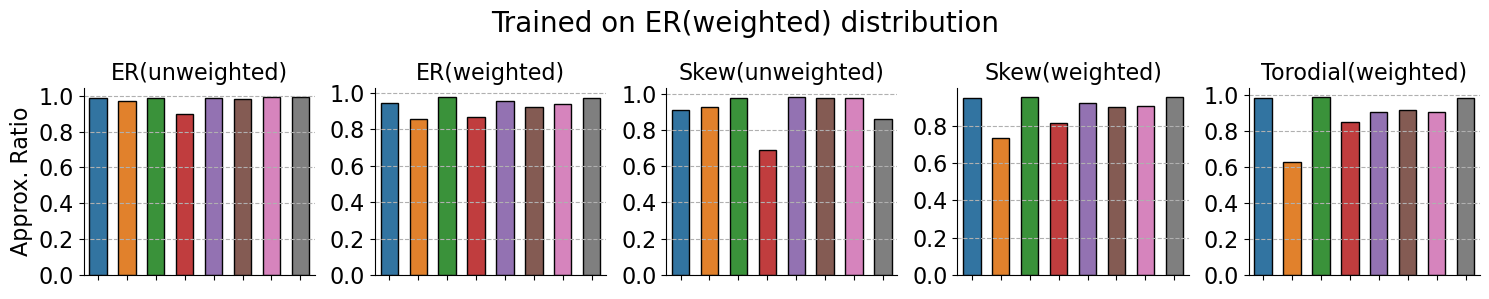

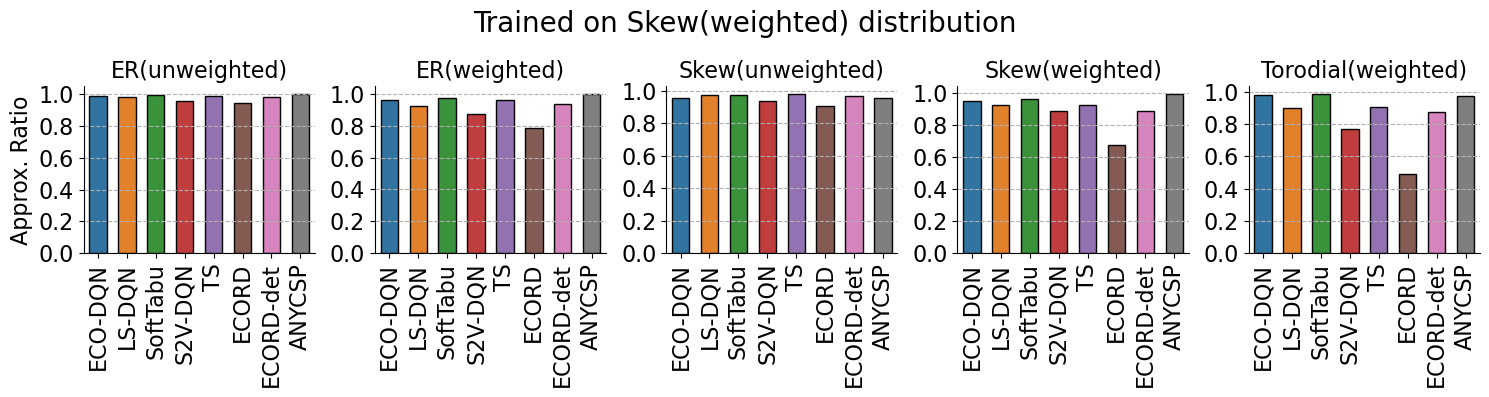

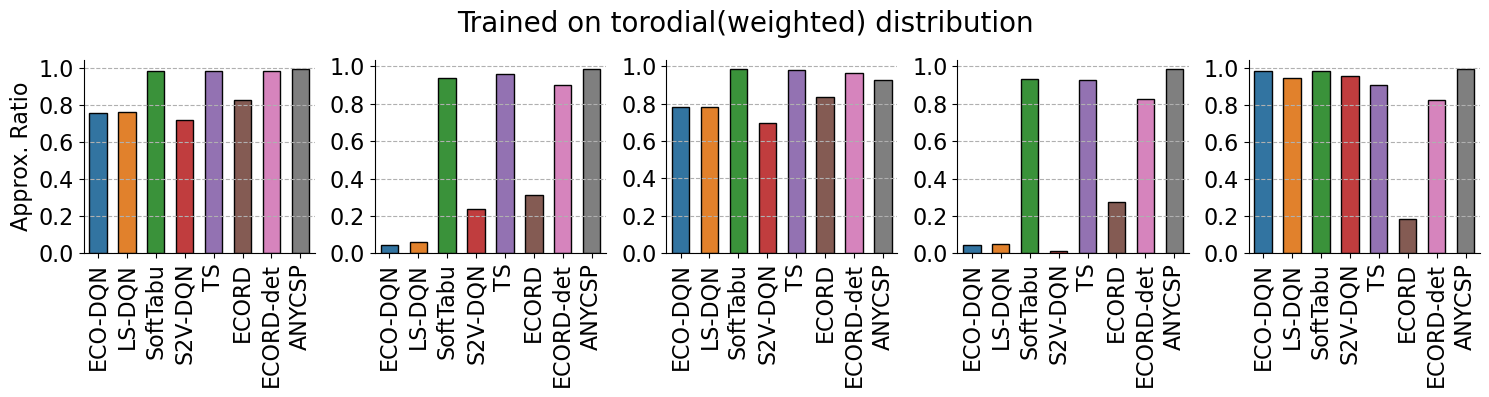

In [17]:
import seaborn as sns
import warnings

# Suppress Matplotlib user warnings
warnings.filterwarnings("ignore", category=UserWarning)

j=0
fig_width = 15

fontsize = 16
for train_dist, train_group_df in df.groupby('Train'):

    if j==0:
        fig_height = 3
    else:
        fig_height =4

    
    fig, axs = plt.subplots(1, 5, figsize=(fig_width, fig_height))
    fig.suptitle(f'Trained on {train_dist}(weighted) distribution', fontsize=20)

    i = 0
    for test_dist, test_group_df in train_group_df.groupby('Test'):
        sns.barplot(data=test_group_df, x="Model", y="Performance Ratio", ax=axs[i], width=0.6, 
                    linewidth=1, edgecolor=".01")
        sns.despine(ax=axs[i], top=True, right=True)
        
        if j==0:
            axs[i].set_xticklabels( [])
            pass
        else:
            axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90,fontsize=16)
            # axs[i].set_xticklabels(['ECO-DQN','LS-DQN','TS+LR','S2V-DQN','TS'], rotation=90,fontsize=16)
        axs[i].set_yticklabels(axs[i].get_yticklabels(),fontsize=16)
        if j!=2:
            axs[i].set_title(test_dist,fontsize=16)
        axs[i].set_xlabel('')
        if i>0:
           axs[i].set_ylabel('')
        else:
            axs[i].set_ylabel('Approx. Ratio',fontsize=16)
        axs[i].grid(True, linestyle='--', alpha=1,axis='y')
        i += 1
        # )
    plt.tight_layout()
    plt.savefig(f'{train_dist}.pdf',format='pdf', dpi=500,bbox_inches='tight')
    plt.show()
    
    j+=1


In [12]:
test_group_df

,Train,Test,Model,Performance Ratio
54,torodial,Torodial(weighted),ECO-DQN,0.984204
59,torodial,Torodial(weighted),LS-DQN,0.950662
64,torodial,Torodial(weighted),TS+LR,0.984203
69,torodial,Torodial(weighted),S2V-DQN,0.958364
74,torodial,Torodial(weighted),TS,0.912902
99,torodial,Torodial(weighted),ECORD,0.186250
104,torodial,Torodial(weighted),ECORD-det,0.829910
119,torodial,Torodial(weighted),ANYCSP,0.996171


In [15]:
test_group_df

,Train,Test,Model,Performance Ratio
29,ER,Torodial(weighted),ECO-DQN,0.981337
34,ER,Torodial(weighted),LSDQN,0.625487
39,ER,Torodial(weighted),TS+LR,0.985630
44,ER,Torodial(weighted),S2V,0.845727
49,ER,Torodial(weighted),TS,0.905622


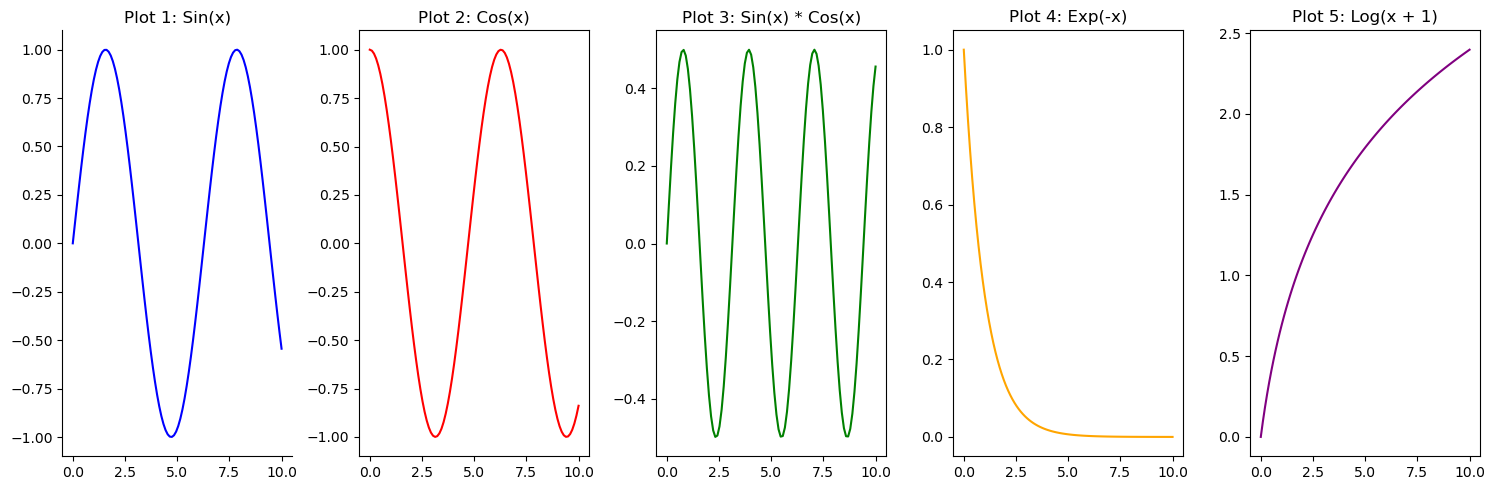

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.cos(x)
y4 = np.exp(-x)
y5 = np.log(x + 1)

# Create a figure and 5 subplots arranged in a row
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Plot data on each subplot
axs[0].plot(x, y1, color='blue')
axs[0].set_title('Plot 1: Sin(x)')
sns.despine(ax=axs[0], top=True, right=True)

axs[1].plot(x, y2, color='red')
axs[1].set_title('Plot 2: Cos(x)')
sns.despine(ax=axs[0], top=True, right=True)
axs[2].plot(x, y3, color='green')
axs[2].set_title('Plot 3: Sin(x) * Cos(x)')
sns.despine(ax=axs[0], top=True, right=True)
axs[3].plot(x, y4, color='orange')
axs[3].set_title('Plot 4: Exp(-x)')
sns.despine(ax=axs[0], top=True, right=True)
axs[4].plot(x, y5, color='purple')
axs[4].set_title('Plot 5: Log(x + 1)')
sns.despine(ax=axs[0], top=True, right=True)
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
